In [36]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense




In [37]:
# Step 1: Prepare the Dataset
df = pd.read_csv('kadaluarsa2.csv', header=None, names=['item', 'expiry_days'])
df['expiry_days'] = pd.to_numeric(df['expiry_days'], errors='coerce')
df['expired'] = df['expiry_days'].apply(lambda x: 1 if x <= 0 else 0)

# One-hot encoding
label_encoder = LabelEncoder()
df['expired'] = label_encoder.fit_transform(df['expired'])



In [38]:
# Step 2: Prepare the input features (X) and target variable (y)
X = df['expiry_days'].values.reshape(-1, 1)
y = df['expired'].values



In [39]:
# Step 3: Build the Model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [43]:
# Step 4: Train the Model
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: nan - accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: nan - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: nan - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: nan - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 6ms/step - loss: nan - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: nan - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: nan - accuracy: 1.0000
Epoch 11/50
4/4 [==============================] - 0s 6ms/step - los

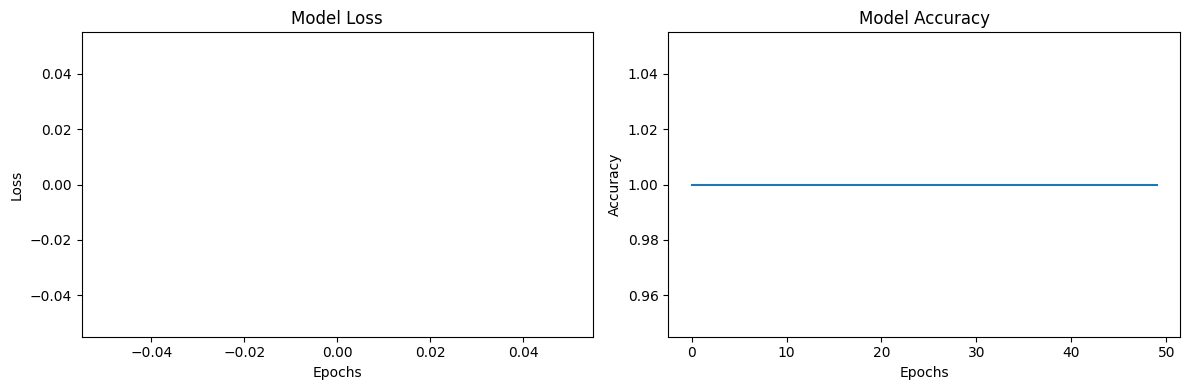

In [44]:
# Step 5: Plot Loss and Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()



In [47]:
# Step 6: Perform Prediction
item = 'Apples' #input("Enter the fresh food item: ")
purchase_date = '06-08-2023' #input("Enter the purchase date (mm-dd-yyyy): ")

item_data = df[df['item'] == item]
if item_data.empty:
    print(f"Item '{item}' is not found in the dataset.")
else:
    expiry_days = item_data['expiry_days'].values[0]
    expiry_date = pd.to_datetime(purchase_date) + pd.DateOffset(days=expiry_days)

    days_since_purchase = (pd.to_datetime('today') - pd.to_datetime(purchase_date)).days

    if days_since_purchase <= expiry_days:
        print(f"Item '{item}' is not expired (will expire on: {expiry_date.strftime('%m-%d-%Y')}).")
    else:
        print(f"Item '{item}' has expired (expired on: {expiry_date.strftime('%m-%d-%Y')}).")

Item 'Apples' is not expired (will expire on: 06-13-2023).
